# Análise do dataset de filmes e séries da Netflix
Responda:
1. Qual é a quantidade de filmes e séries no dataset?
2. Qual o top 5 países com mais produções?
3. Como está distribuído o número de produções por ano?
4. Qual é a média de duração dos filmes?
5. Quantos filmes foram lançados no mesmo ano do seu nascimento?

Utilize pelo menos:
- Gráfico de barras
- Histograma
- Boxplot
- Countplot
- Scatter Plot

## Preparando o ambiente

In [174]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Definindo informações visuais
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Análises primárias do dataset

In [175]:
#Carregando o dataset
df = pd.read_csv('netflix_titles.csv', sep = ',')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [176]:
#Análise técnica   
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [177]:
#Análise estatística de dados numéricos
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Análise específica

### Quantidade total de filmes e de séries dentro do dataset:

In [178]:
df.value_counts('type')

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Com base nesse dados, há um desbalancemento entre dados, pois há mais filmes do que séries no dataset.

### Top 5 países com mais produções:

In [179]:
df.value_counts('country')[0:5]


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64

In [180]:
df_country_prod = pd.DataFrame(df['country'].value_counts()).reset_index()
filtro_country_prod = df_country_prod[df_country_prod['count'] >= 199]
df_country_prod_filtrado = pd.DataFrame(filtro_country_prod)
df_country_prod_filtrado


,country,count
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


Verifica-se que os países com mais produções no dataset são os Estados Unidos, India, Reino Unido, Japão e Coreia do Sul, em ordem decrescente.

Graficamente, tem-se:

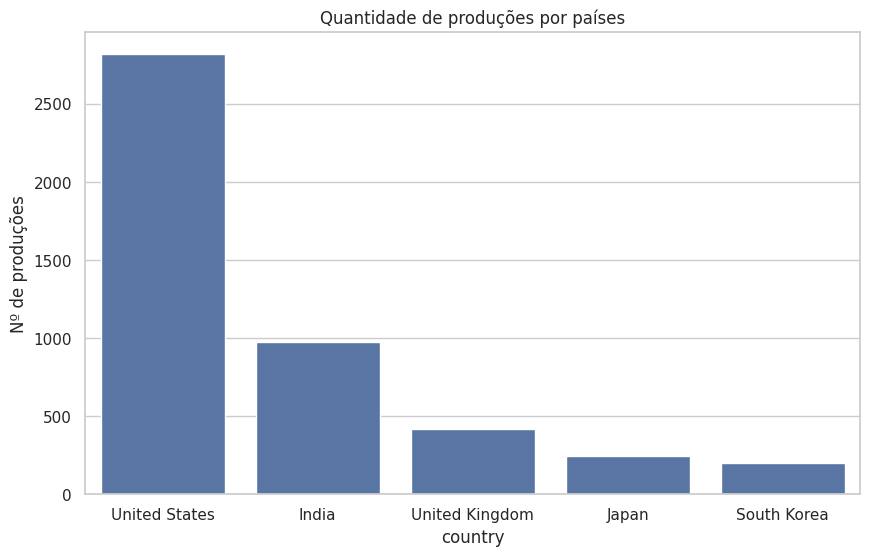

In [181]:
# Análise gráfica dos dados
sns.barplot(data = df_country_prod_filtrado, x = 'country', y = 'count')
plt.title('Quantidade de produções por países')
plt.ylabel('Nº de produções')
plt.show()
# criando gráficos com matplotlib e seaborn

In [182]:
barplot_prod_country = px.bar(df_country_prod_filtrado, x = 'country', y = 'count', title = 'Quantidade de produções por países', )
barplot_prod_country.show()
#Criando gráficos com o plotly

### Distribuição do número de produções por ano

In [183]:
# Contagem por ano
df.value_counts('release_year')

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: count, Length: 74, dtype: int64

In [184]:
#criação de um novo dataframe para plotar gráfico no plotly
df_prod_year = pd.DataFrame(df.value_counts('release_year')).rename(columns = {'count': 'productions'}).reset_index()
df_prod_year.head()
#O tratamento de rename e indice foram necessários para substituir o nome count e para transformar o release_year uma coluna.

,release_year,productions
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


Graficamente tem-se:

In [185]:
barplot_prod_ano = px.bar(df_prod_year, x= 'release_year', y= 'productions', title = "Quantidade de produções lançadas por ano")
barplot_prod_ano.show()

Observamos que há uma quantidade mais significativa de produções por ano a partir dos anos 2000.
É interessante aplicar um filtro para melhor visualizações desses dados.

In [186]:
filtro_prod_year = df_prod_year[df_prod_year['productions'] >= 100]
filtro_prod_year.head()

,release_year,productions
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902


In [187]:
#criando mais um dataframe para trabalhar com plotlty
df_prod_year_filtrado = pd.DataFrame(filtro_prod_year)


In [188]:
barplot_prod_year_filtrado = px.bar(df_prod_year_filtrado, x= 'release_year', y= 'productions',
                                        title = 'Quantidade de produções lançadas por ano')
barplot_prod_year_filtrado.show()

### Média de duração dos filmes



Para analisarmos a média de duração de filmes, precisamos criar um novo dataframe e tratá-lo.


In [189]:
df_movie_durat = pd.DataFrame(df.loc[df['type'] == 'Movie', 'duration'].value_counts().reset_index())
#a coluna de duração dos filmes precisa ser convertida, pois a duração está em string 
df_movie_durat_tratado = pd.DataFrame(df_movie_durat.loc[:, 'duration'].str.replace(' min', '').astype(int))
df_movie_durat_tratado.describe()


,duration
count,205.000000
mean,110.395122
std,63.942797
min,3.000000
25%,57.000000
50%,108.000000
75%,159.000000
max,312.000000


A duração média de cada filme é 110 minutos.
Graficamente, tem-se:

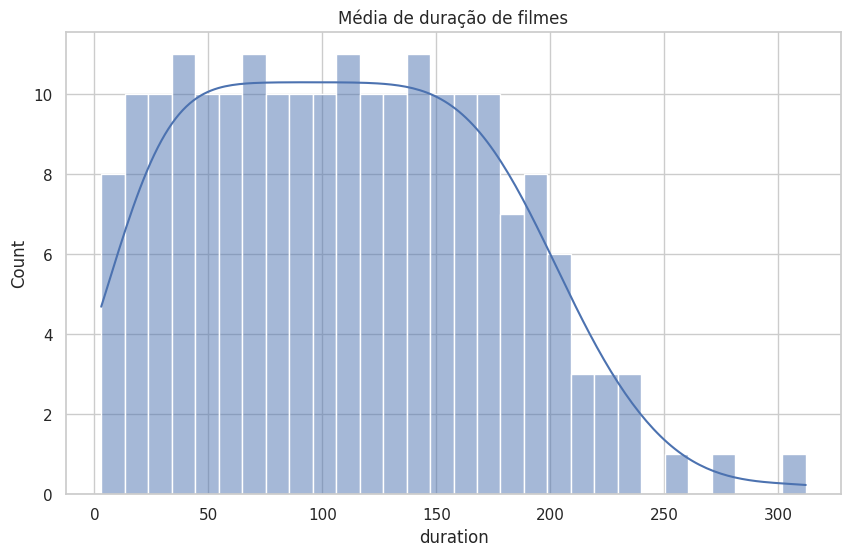

In [190]:
sns.histplot(data = df_movie_durat_tratado, x = 'duration', bins= 30, kde = True)
plt.title('Média de duração de filmes')
plt.show()
# Histograma criado pelo matplolib


In [172]:
histplot_movie_duration = px.histogram(df_movie_durat_tratado, x = 'duration', nbins = 100, title = 'Média de duração de filmes')
histplot_movie_duration.show()
# gráfico no plotly, não tem linha kde para a gaussiana

### Quantos filmes foram lançados no ano do meu nascimento

O ano do meu nascimento é 2005. Logo, preciso filtra-se os filmes de 2005.

In [191]:
df_years = pd.DataFrame(df.loc[df['type'] == 'Movie', 'release_year'].value_counts().reset_index())
df_years[df_years['release_year'] == 2005]

,release_year,count
16,2005,67


Foram lançados 67 filmes em 2005